Current theme: darkly


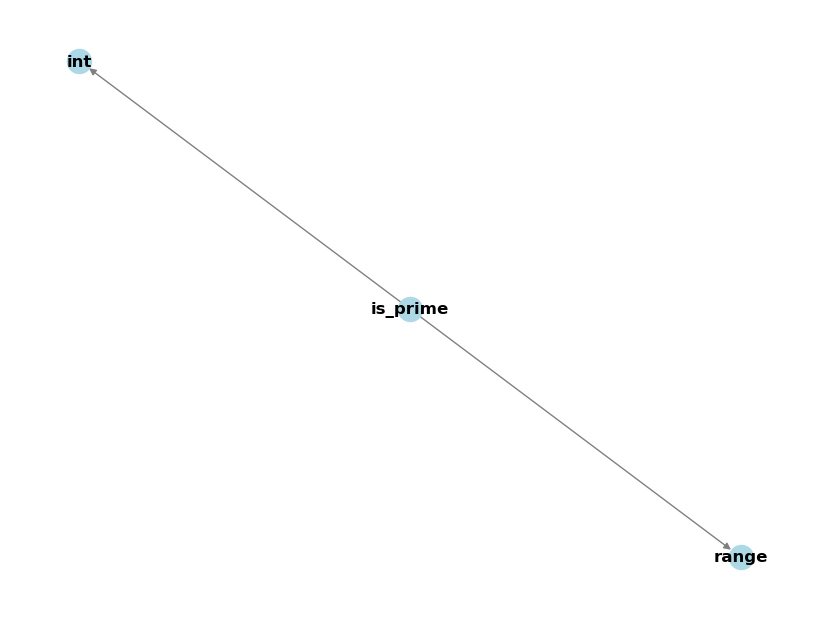

In [ ]:
import tkinter as tk
from tkinter import filedialog, messagebox
import ttkbootstrap as ttk
from ttkbootstrap.constants import *
import networkx as nx
import ast
import os
import matplotlib.pyplot as plt

# Initialize main window with modern theme
root = ttk.Window(themename="darkly")
root.title("Code Modularization Tool")

def code_analysis(code):
    """Parse user code into a dependency graph."""
    tree = ast.parse(code)
    graph = nx.DiGraph()

    for node in ast.walk(tree):
        if isinstance(node, (ast.FunctionDef, ast.ClassDef)):
            graph.add_node(node.name)
            for child in ast.walk(node):
                if isinstance(child, ast.Call):
                    if isinstance(child.func, ast.Name):
                        graph.add_edge(node.name, child.func.id)
                    elif isinstance(child.func, ast.Attribute):
                        graph.add_edge(node.name, child.func.attr)
    return graph

def modularize_code(graph):
    """Partition the graph using Kernighan-Lin algorithm."""
    try:
        if len(graph) < 2:
            return ["Graph too small for partitioning"]
        undirected_graph = graph.to_undirected()
        partitions = nx.algorithms.community.kernighan_lin_bisection(undirected_graph)
        return partitions
    except Exception as e:
        return str(e)

def save_partitions(code, partitions):
    """Save partitioned code to files."""
    output_dir = "code_in_modules"
    os.makedirs(output_dir, exist_ok=True)
    
    tree = ast.parse(code)
    for idx, partition in enumerate(partitions):
        filename = os.path.join(output_dir, f"module_{idx + 1}.py")
        with open(filename, "w") as file:
            for node_name in partition:
                for node in ast.walk(tree):
                    if isinstance(node, (ast.FunctionDef, ast.ClassDef)) and node.name == node_name:
                        file.write(ast.get_source_segment(code, node) + "\n\n")

def process_code():
    """Process code from input and display results."""
    user_code = text_input.get("1.0", tk.END).strip()
    if not user_code:
        messagebox.showerror("Error", "No code provided!")
        return
    
    graph = code_analysis(user_code)
    partitions = modularize_code(graph)

    if isinstance(partitions, str):
        messagebox.showerror("Error", partitions)
        return
    
    save_partitions(user_code, partitions)
    
    text_output.config(state="normal")
    text_output.delete("1.0", tk.END)
    
    for i, partition in enumerate(partitions):
        tag = f"module{i+1}"
        text_output.insert(tk.END, f"Module {i + 1}: {', '.join(partition)}\n", tag)
    
    text_output.config(state="disabled")
    messagebox.showinfo("Success", "Code modularized! Results saved in 'code_in_modules' folder.")
    visualize_graph(graph)

def visualize_graph(graph):
    """Display the dependency graph."""
    plt.figure(figsize=(8, 6))
    nx.draw(graph, with_labels=True, node_color="lightblue", edge_color="gray", font_weight="bold")
    plt.show()

def clear_screen():
    """Clear input and output text areas."""
    text_input.delete("1.0", tk.END)
    text_output.config(state="normal")
    text_output.delete("1.0", tk.END)
    text_output.config(state="disabled")

def toggle_dark_mode():
    """Switch between light and dark mode."""
    current_theme = root.style.theme_use()
    new_theme = "journal" if current_theme == "darkly" else "darkly"
    root.style.theme_use(new_theme)

# UI Setup with ttkbootstrap
frame_input = ttk.Frame(root)
frame_input.pack(pady=10)

ttk.Label(frame_input, text="Paste your Python code:", font=("Courier", 12, "bold")).pack(anchor="w")
text_input = tk.Text(frame_input, height=15, width=80, font=("Courier", 10))
text_input.pack()

frame_output = ttk.Frame(root)
frame_output.pack(pady=10)

ttk.Label(frame_output, text="Suggested Modules:", font=("Courier", 12, "bold")).pack(anchor="w")
text_output = tk.Text(frame_output, height=10, width=80, font=("Courier", 10), state="disabled")
text_output.pack()

# Tag styles for module output
text_output.tag_config("module1", foreground="skyblue")
text_output.tag_config("module2", foreground="lightgreen")
text_output.tag_config("module3", foreground="salmon")

button_frame = ttk.Frame(root)
button_frame.pack(pady=10)

# Buttons with bootstyle (color)
process_button = ttk.Button(button_frame, text="Modularize Code", command=process_code, bootstyle="primary")
process_button.pack(side="left", padx=5)

clear_button = ttk.Button(button_frame, text="Clear Screen", command=clear_screen, bootstyle="warning")
clear_button.pack(side="left", padx=5)

theme_button = ttk.Button(button_frame, text="Toggle Dark Mode", command=toggle_dark_mode, bootstyle="secondary")
theme_button.pack(side="left", padx=5)

exit_button = ttk.Button(button_frame, text="Exit", command=root.destroy, bootstyle="danger")
exit_button.pack(side="left", padx=5)

print("Current theme:", root.style.theme_use())
root.mainloop()


In [15]:
pip install ttkbootstrap

Note: you may need to restart the kernel to use updated packages.
